In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,precision_score,f1_score
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.tree import plot_tree
from sklearn.datasets import *

In [6]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [7]:
df=sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [8]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
df1=df.drop(['sibsp','parch','embarked','class','who','adult_male','deck','embark_town','alive','alone'],axis=1)

In [10]:
df1

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [11]:
df1.isna().sum()

survived      0
pclass        0
sex           0
age         177
fare          0
dtype: int64

In [12]:
df1.fillna(df1.age.mean(),inplace=True)

In [13]:
df1

,survived,pclass,sex,age,fare
0,0,3,male,22.000000,7.2500
1,1,1,female,38.000000,71.2833
2,1,3,female,26.000000,7.9250
3,1,1,female,35.000000,53.1000
4,0,3,male,35.000000,8.0500
...,...,...,...,...,...
886,0,2,male,27.000000,13.0000
887,1,1,female,19.000000,30.0000
888,0,3,female,29.699118,23.4500
889,1,1,male,26.000000,30.0000


In [14]:
df1.isna().sum()

survived    0
pclass      0
sex         0
age         0
fare        0
dtype: int64

In [16]:
X1=df1.drop(['survived'],axis=1)
X1

,pclass,sex,age,fare
0,3,male,22.000000,7.2500
1,1,female,38.000000,71.2833
2,3,female,26.000000,7.9250
3,1,female,35.000000,53.1000
4,3,male,35.000000,8.0500
...,...,...,...,...
886,2,male,27.000000,13.0000
887,1,female,19.000000,30.0000
888,3,female,29.699118,23.4500
889,1,male,26.000000,30.0000


In [17]:
y=df1["survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [19]:
X=pd.get_dummies(X1,drop_first=4)
X

,pclass,age,fare,sex_male
0,3,22.000000,7.2500,1
1,1,38.000000,71.2833,0
2,3,26.000000,7.9250,0
3,1,35.000000,53.1000,0
4,3,35.000000,8.0500,1
...,...,...,...,...
886,2,27.000000,13.0000,1
887,1,19.000000,30.0000,0
888,3,29.699118,23.4500,0
889,1,26.000000,30.0000,1


In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [22]:
model=GaussianNB()

In [23]:
model.fit(X_train,y_train)

GaussianNB()

In [24]:
model.score(X_test,y_test)

0.7597765363128491

In [25]:
y_pred=model.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0], dtype=int64)

In [26]:
y_test

445    1
835    1
885    0
65     1
854    0
      ..
164    0
147    0
506    1
106    1
839    1
Name: survived, Length: 179, dtype: int64

In [27]:
confusion_matrix(y_test,y_pred)

array([[95, 24],
       [19, 41]], dtype=int64)

<Axes: >

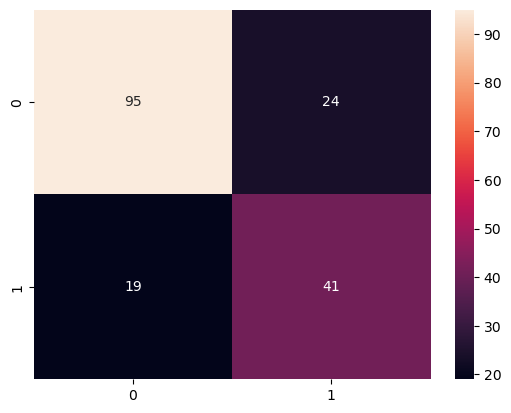

In [28]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [29]:
from sklearn.naive_bayes import MultinomialNB

In [30]:
X

,pclass,age,fare,sex_male
0,3,22.000000,7.2500,1
1,1,38.000000,71.2833,0
2,3,26.000000,7.9250,0
3,1,35.000000,53.1000,0
4,3,35.000000,8.0500,1
...,...,...,...,...
886,2,27.000000,13.0000,1
887,1,19.000000,30.0000,0
888,3,29.699118,23.4500,0
889,1,26.000000,30.0000,1


In [32]:
model1=MultinomialNB()

In [33]:
model1.fit(X_train,y_train)

MultinomialNB()

In [34]:
model1.score(X_test,y_test)

0.6759776536312849

In [35]:
multi_pored=model1.predict(X_test)

In [36]:
multi_pored

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0], dtype=int64)

In [37]:
y_test

445    1
835    1
885    0
65     1
854    0
      ..
164    0
147    0
506    1
106    1
839    1
Name: survived, Length: 179, dtype: int64

In [38]:
confusion_matrix(y_test,multi_pored)

array([[94, 25],
       [33, 27]], dtype=int64)

<Axes: >

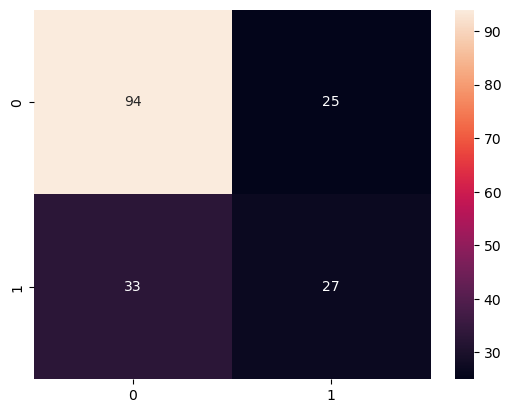

In [39]:
sns.heatmap(confusion_matrix(y_test,multi_pored),annot=True)

In [41]:
model1.predict_proba(X_test)

array([[1.09910976e-14, 1.00000000e+00],
       [2.37122672e-09, 9.99999998e-01],
       [9.94477573e-01, 5.52242673e-03],
       [9.99860506e-01, 1.39493885e-04],
       [9.99662302e-01, 3.37698461e-04],
       [9.99824597e-01, 1.75402677e-04],
       [9.99980018e-01, 1.99824611e-05],
       [9.99974451e-01, 2.55490035e-05],
       [9.99999134e-01, 8.66105648e-07],
       [9.90015765e-01, 9.98423459e-03],
       [9.99997705e-01, 2.29457923e-06],
       [9.99682917e-01, 3.17082852e-04],
       [1.36115679e-05, 9.99986388e-01],
       [9.99989156e-01, 1.08439808e-05],
       [3.65603063e-04, 9.99634397e-01],
       [2.16501301e-02, 9.78349870e-01],
       [9.97599426e-01, 2.40057445e-03],
       [9.99994921e-01, 5.07919588e-06],
       [9.95719267e-01, 4.28073330e-03],
       [9.99232177e-01, 7.67822512e-04],
       [2.09075563e-04, 9.99790924e-01],
       [9.99999694e-01, 3.06260566e-07],
       [9.99811085e-01, 1.88914655e-04],
       [9.99999320e-01, 6.80259566e-07],
       [9.999872

In [42]:
model1.predict_proba(X_test.iloc[:5,:])

array([[1.09910976e-14, 1.00000000e+00],
       [2.37122672e-09, 9.99999998e-01],
       [9.94477573e-01, 5.52242673e-03],
       [9.99860506e-01, 1.39493885e-04],
       [9.99662302e-01, 3.37698461e-04]])

In [43]:
X_test.iloc[:5,:]

,pclass,age,fare,sex_male
445,1,4.000000,81.8583,1
835,1,39.000000,83.1583,0
885,3,39.000000,29.1250,0
65,3,29.699118,15.2458,1
854,2,44.000000,26.0000,0


In [48]:
model1.predict(X_test.iloc[:5,:])

array([1, 1, 0, 0, 0], dtype=int64)